
#1.Define the optimization problem by Mathematic equations.

#2. one variable  method: using constraint to replace one variable 

#2.1 run tensorflow gradient descent to answer the question.

#2.2 run genetic algorithm answer the question.<br>



1.

>>$A(y)=(500-2y)y=500y-2y^2 $<br>

>>$A`(y)=500-2y$<br>

In [58]:
!pip install gaft



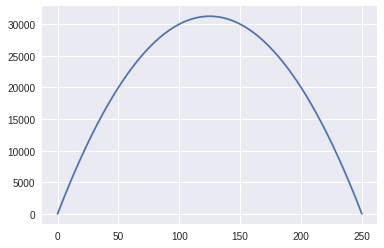

In [62]:
import tensorflow as tf
import numpy as np

%matplotlib inline
import pylab

def func_q(h):
  return 500*h-2*h**2
def func_q1(h):
  return 500-2*h


x = np.linspace(0, 250, 1000)
y =func_q(x)

pylab.plot(x, y,)


In [64]:
h = tf.Variable(tf.random_uniform([1], -10, 10.0))


func_tf =10000- func_q(h)

loss = func_tf 
optimizer = tf.train.GradientDescentOptimizer(0.01) 
train = optimizer.minimize(loss)
init = tf.initialize_all_variables()

print("loss:", loss)
print("optimizer:", optimizer)
print("train:", train)
#print(init)

# 1.6 Create a session and launch the graph.
sess = tf.Session()
sess.run(init)

#print(sess.run([h]))


for step in range(150):
    sess.run(train)
print(sess.run([h]))

loss: Tensor("sub_21:0", shape=(1,), dtype=float32)
optimizer: <tensorflow.python.training.gradient_descent.GradientDescentOptimizer object at 0x7fb6e13737b8>
train: name: "GradientDescent_11"
op: "NoOp"
input: "^GradientDescent_11/update_Variable_14/ApplyGradientDescent"

[array([124.712585], dtype=float32)]


In [67]:
from math import sin, cos, pi

from gaft import GAEngine
from gaft.components import BinaryIndividual
from gaft.components import Population
from gaft.operators import TournamentSelection
from gaft.operators import UniformCrossover
from gaft.operators import FlipBitBigMutation

# Built-in best fitness analysis.
from gaft.analysis.fitness_store import FitnessStore
from gaft.analysis.console_output import ConsoleOutput


indv_template = BinaryIndividual(ranges=[(0, 250)], eps=0.001)
population = Population(indv_template=indv_template, size=50).init()

selection = TournamentSelection()
crossover = UniformCrossover(pc=0.8, pe=0.5)
mutation = FlipBitBigMutation(pm=0.1, pbm=0.55, alpha=0.6)

engine = GAEngine(population=population, selection=selection,
                  crossover=crossover, mutation=mutation,
                  analysis=[ConsoleOutput, FitnessStore])

# Define fitness function.
@engine.fitness_register
def fitness(indv):
    h, = indv.solution
    return 500*h-2*h**2

if '__main__' == __name__:

  engine.run(ng=78)

gaft.ConsoleOutput   INFO     Generation number: 78 Population number: 50
gaft.ConsoleOutput   INFO     Generation: 1, best fitness: 31248.166, scaled fitness: 31248.166
gaft.ConsoleOutput   INFO     Generation: 2, best fitness: 31248.166, scaled fitness: 31248.166
gaft.ConsoleOutput   INFO     Generation: 3, best fitness: 31248.166, scaled fitness: 31248.166
gaft.ConsoleOutput   INFO     Generation: 4, best fitness: 31249.560, scaled fitness: 31249.560
gaft.ConsoleOutput   INFO     Generation: 5, best fitness: 31249.563, scaled fitness: 31249.563
gaft.ConsoleOutput   INFO     Generation: 6, best fitness: 31249.836, scaled fitness: 31249.836
gaft.ConsoleOutput   INFO     Generation: 7, best fitness: 31249.836, scaled fitness: 31249.836
gaft.ConsoleOutput   INFO     Generation: 8, best fitness: 31249.836, scaled fitness: 31249.836
gaft.ConsoleOutput   INFO     Generation: 9, best fitness: 31249.836, scaled fitness: 31249.836
gaft.ConsoleOutput   INFO     Generation: 10, best fitness: 31